In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar FRF a partir do CSV FRF_easy_to_import.xlsx

In [86]:
df = pd.read_excel("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF_easy_to_import.xlsx")

In [87]:
df.columns

Index(['Frequencia', 'Signal 2 (Real)', 'Signal 2 (Imag.)', 'Signal 3 (Real)',
       'Signal 3 (Imag.)', 'Signal 4 (Real)', 'Signal 4 (Imag.)'],
      dtype='object')

In [88]:
print(type(df['Frequencia'][0]))
print(type(df['Signal 2 (Real)'][0]))
print(type(df['Signal 2 (Imag.)'][0]))
print(type(df['Signal 3 (Real)'][0]))
print(type(df['Signal 3 (Imag.)'][0]))
print(type(df['Signal 4 (Real)'][0]))
print(type(df['Signal 4 (Imag.)'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


# Plotando os gráfico das FRF experimentais

In [89]:
freq = df['Frequencia']
print(len(freq))

801


In [90]:
frf_2_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)'])
print(frf_2_andar.shape)

(801,)


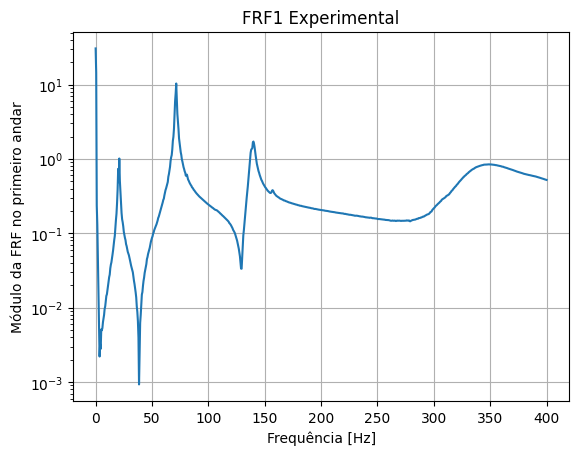

In [91]:
# Plotar gráfico da FRF do primeiro andar
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no primeiro andar')
plt.title('FRF1 Experimental')
plt.grid()
plt.yscale('log')
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_andar.png")
plt.show()

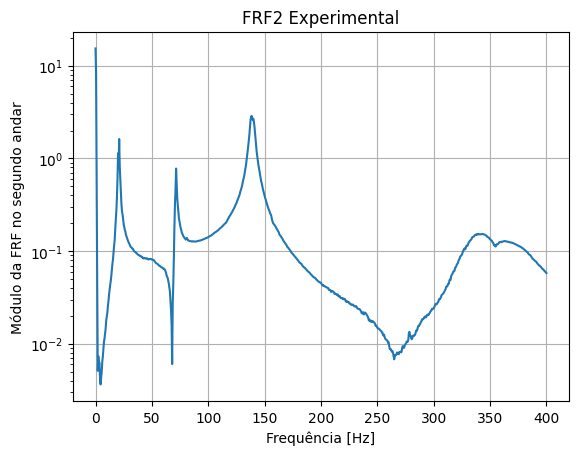

In [92]:
# Plotar gráfico da FRF do segundo andar
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no segundo andar')
plt.title('FRF2 Experimental')
plt.grid()
plt.yscale('log')
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_andar.png")
plt.show()

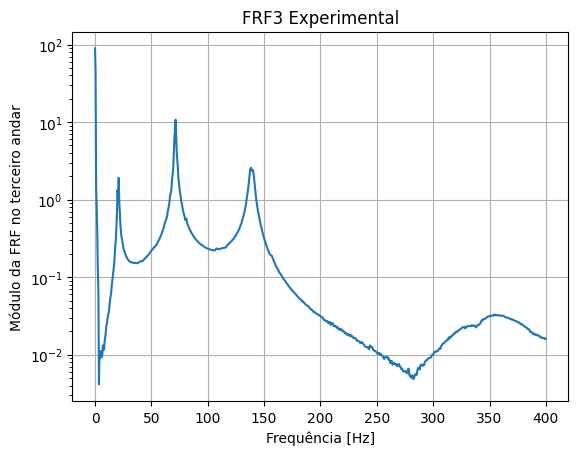

In [93]:
# Plotar gráfico da FRF do terceiro andar
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no terceiro andar')
plt.title('FRF3 Experimental')
plt.grid()
plt.yscale('log')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_andar.png")
plt.show()

# Salvando as FRF de cada andar

In [94]:
frf_1_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_1_andar.xlsx')
frf_2_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_2_andar.xlsx')
frf_3_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_3_andar.xlsx')

# Amortecimentos no Primeiro andar

In [95]:
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) 
freq = df['Frequencia']
print(frf_1_andar.shape)
print(freq.shape)

(801,)
(801,)


In [96]:
w_1 = []
w_2 = []
w_n = []

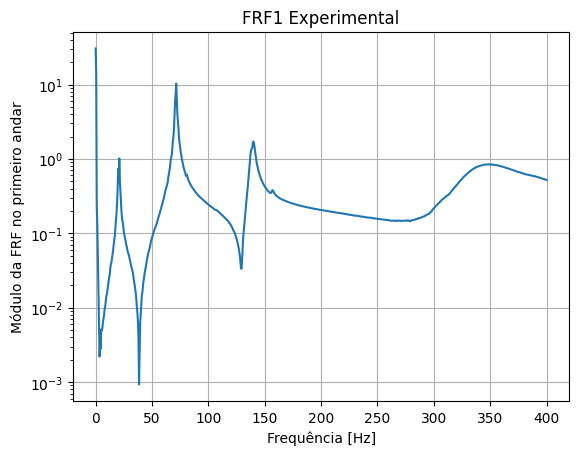

In [97]:
maior = frf_1_andar[2]
cont = 0
for i in range(2, 50):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.0129031
0.7162306506948756
42
21.0


In [98]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [99]:
x = [19.5, 20]
y = [0.38753028, 0.73591509]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 19.971748998894178


In [100]:
x = [21.5, 21]
y = [0.50667976, 1.0129031]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 21.29302525769073


In [101]:
print(maior/np.sqrt(2))

0.7162306506948756


In [102]:
maior = frf_1_andar[50]
cont = 0
for i in range(50, 200):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

10.328243
7.303170663042491
143
71.5


In [103]:
x = [70.5, 71]
y = [5.987467, 7.587771]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 70.91107928963575


In [104]:
x = [72, 71.5]
y = [6.598632, 10.328243]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 71.90554796960829


In [105]:
print(freq[144])
print(frf_1_andar[144])
print(freq[143])
print(frf_1_andar[143])

72.0
6.598632
71.5
10.328243


In [106]:
print(freq[141])
print(frf_1_andar[141])
print(freq[142])
print(frf_1_andar[142])

70.5
5.9874670000000005
71.0
7.587771


In [107]:
print(maior/np.sqrt(2))

7.303170663042491


In [108]:
maior = frf_1_andar[50]
cont = 0
for i in range(200, len(frf_1_andar)):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.7128028
1.2111344747153059
280
140.0


In [109]:
x = [137.5, 138]
y = [1.2081656, 1.3307448]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 137.512110026478


In [110]:
print(freq[275])
print(frf_1_andar[275])
print(freq[276])
print(frf_1_andar[276])

137.5
1.2081656
138.0
1.3307448


In [111]:
x = [284*0.5 ,283*0.5]
y = [1.0990418 ,1.2538949]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 141.6380677083142


In [112]:
print(freq[284])
print(frf_1_andar[284])
print(freq[283])
print(frf_1_andar[283])

142.0
1.0990418
141.5
1.2538949


In [113]:
print(maior/np.sqrt(2))

1.2111344747153059


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [114]:
print(w_n)
print(w_1)
print(w_2)
q_si = []

[21.0, 71.5, 140.0]
[19.971748998894178, 70.91107928963575, 137.512110026478]
[21.29302525769073, 71.90554796960829, 141.6380677083142]


In [115]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*np.pi

In [116]:
print(w_n)
print(w_1)
print(w_2)

[65.97344572538566, 224.6238747316702, 439.822971502571]
[62.74309993426525, 222.773725754443, 432.0070346388147]
[66.8940117222631, 225.89794125366987, 444.9691129810936]


In [77]:
for i in range(0,3):
    q_si.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

In [78]:
q_si

[0.031458958542775035, 0.006954326433374417, 0.01473556314941494]

# Amortecimentos no Segundo andar

In [16]:
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) 
freq = df['Frequencia']

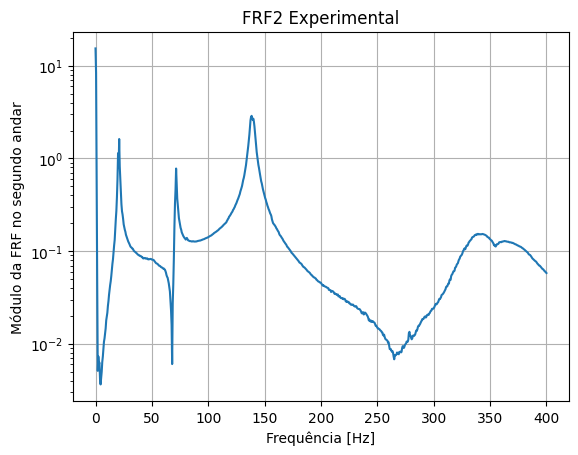

In [17]:
maior = frf_2_andar[2]
cont = 0
for i in range(2, 50):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

print(maior)
print(cont)
print(freq[cont])

1.6221873
42
21.0


In [18]:
print(maior/np.sqrt(2))

1.1470596401846962


In [19]:
maior = frf_2_andar[50]
cont = 0
for i in range(50, 200):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

print(maior)
print(cont)
print(freq[cont])

0.7791773
143
71.5


In [20]:
print(maior/np.sqrt(2))

0.5509615525766248


In [21]:
maior = frf_2_andar[50]
cont = 0
for i in range(200, len(frf_2_andar)):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

print(maior)
print(cont)
print(freq[cont])

2.8845606999999998
277
138.5


In [22]:
print(maior/np.sqrt(2))

2.039692431714214


# Amortecimentos no Terceiro Andar

In [61]:
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)'])
freq = df['Frequencia']

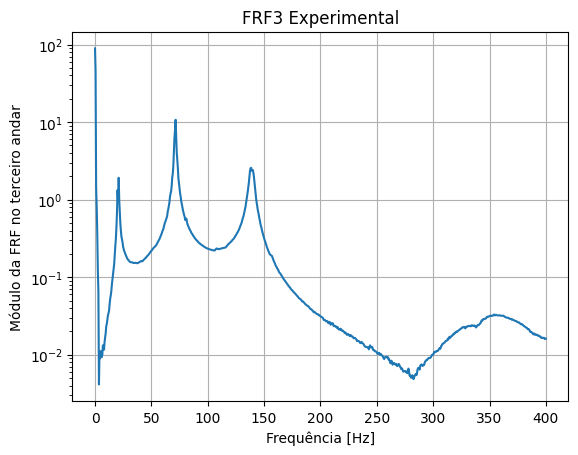

In [62]:
maior = frf_3_andar[2]
cont = 0
for i in range(2, 50):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

print(maior)
print(cont)
print(freq[cont])

1.9153889
42
21.0


In [63]:
maior = frf_3_andar[50]
cont = 0
for i in range(50, 200):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

print(maior)
print(cont)
print(freq[cont])

10.731814
143
71.5


In [64]:
maior = frf_3_andar[50]
cont = 0
for i in range(200, len(frf_3_andar)):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

print(maior)
print(cont)
print(freq[cont])

2.5768638
277
138.5
